In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$
x = \left( t \cos(\theta) - e^{M|t|} \sin(0.3t)\sin(\theta) + X \right)
$$

$$
y = \left (42 + t*\sin(\theta)+e^{M\left|t\right|}\cdot\sin(0.3t)\cos(\theta)\right)
$$


$$
0 \deg<\theta<50 \deg \\
-0.05<M<0.05 \\
0<X<100\\
6<t<60
$$

In [4]:
df = pd.read_csv("xy_data.csv")
x = df["x"]
y = df["y"]
t = np.linspace(6.0, 60.0, len(x))
print(f"x: {x.dtypes},y: {y.dtypes},\n{df.head()}\n{df.shape}")

x: float64,y: float64,
            x          y
0   88.364456  57.784378
1   74.283936  54.406780
2   60.256474  46.311462
3   82.134370  57.717567
4  101.036390  67.849340
(1500, 2)


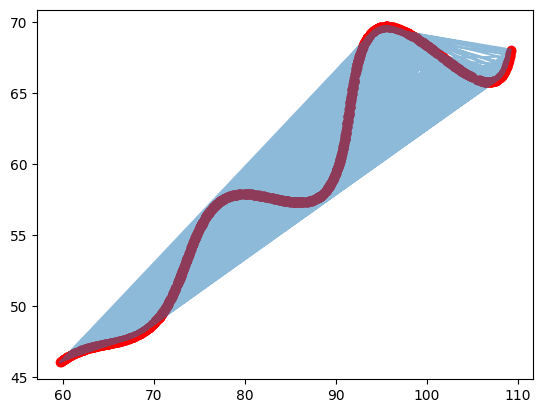

In [5]:
plt.plot(x,y,alpha = 0.5)
plt.scatter(x,y,color = "red")

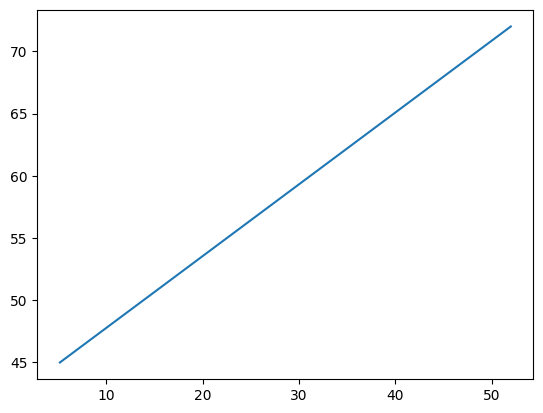

In [6]:
plt.plot(t*np.cos(np.deg2rad(30)) ,42 + t*np.sin(np.deg2rad(30)) )

In [ ]:
# Initial tinkering. will follow up with a grid search


# Gridsearch

In [9]:
def curve(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    exp_term = np.exp(M * np.abs(t))
    x_pred = t * np.cos(theta) - exp_term * np.sin(0.3 * t) * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + exp_term * np.sin(0.3 * t) * np.cos(theta)
    return x_pred, y_pred

theta_grid = np.linspace(0, 50, 51)    
M_grid = np.linspace(-0.05, 0.05, 21)    
X_grid = np.linspace(0, 100, 21)         

best_loss = float("inf")
best_params = None

for theta in theta_grid:
    for M in M_grid:
        for X in X_grid:
            x_pred, y_pred = curve_model(t, theta, M, X)
            loss = np.mean(np.abs(x - x_pred) + np.abs(y - y_pred))
            if loss < best_loss:
                best_loss = loss
                best_params = (theta, M, X)


print(f"θ = {best_params[0]}")
print(f"M = {best_params[1]}")
print(f"X = {best_params[2]}")
print(f"min L1 {best_loss}")

θ = 28.0
M = 0.020000000000000004
X = 55.0
min L1 25.244341261851268
